# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:

- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [ ]:

repo_path = '/Users/srushtihirve/Desktop/Ersilia' #enter your repo path here
import rdkit
import pathlib
import chemprop
import numpy as np
import pandas as pd
from rdkit import Chem
import sys 
import ersilia
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
reference_library_path = os.path.join(repo_path,'data/Input.csv')
reference_library = pd.read_csv(reference_library_path,skiprows=3)
print(reference_library.head())

                                              Smiles   IC50   In vitro result  \
0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1     75  hERG non-blocker   
1                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C  262.2  hERG non-blocker   
2                                    CCCC(CCC)C(=O)O     20  hERG non-blocker   
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C     90  hERG non-blocker   
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...     44  hERG non-blocker   

            DeepHIT          CardPred OCHEM Predictor \n(Consensus I)  \
0  hERG non-blocker  hERG non-blocker                hERG non-blocker   
1  hERG non-blocker  hERG non-blocker                hERG non-blocker   
2  hERG non-blocker  hERG non-blocker                hERG non-blocker   
3  hERG non-blocker  hERG non-blocker                    hERG blocker   
4  hERG non-blocker  hERG non-blocker                hERG non-blocker   

  OCHEM Predictor\n(Consensus II)     Pred-hERG 4.2  
0                hER

In [17]:
from src.smiles_processing import standardise_smiles
smiles_list = reference_library['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
reference_library['Standardised_smiles'] = standardised_smiles_list

In [19]:
# use to create inchikeys
from src.convert_smiles import smiles_to_inchikey

reference_library['Inchikey'] = reference_library['Smiles'].apply(smiles_to_inchikey)
print(reference_library.head())

                                              Smiles   IC50   In vitro result  \
0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1     75  hERG non-blocker   
1                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C  262.2  hERG non-blocker   
2                                    CCCC(CCC)C(=O)O     20  hERG non-blocker   
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C     90  hERG non-blocker   
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...     44  hERG non-blocker   

            DeepHIT          CardPred OCHEM Predictor \n(Consensus I)  \
0  hERG non-blocker  hERG non-blocker                hERG non-blocker   
1  hERG non-blocker  hERG non-blocker                hERG non-blocker   
2  hERG non-blocker  hERG non-blocker                hERG non-blocker   
3  hERG non-blocker  hERG non-blocker                    hERG blocker   
4  hERG non-blocker  hERG non-blocker                hERG non-blocker   

  OCHEM Predictor\n(Consensus II)     Pred-hERG 4.2  \
0                hE

In [21]:
#drop smiles
reference_library.drop(columns=['Smiles'],inplace=True)
print(reference_library.head())

    IC50   In vitro result           DeepHIT          CardPred  \
0     75  hERG non-blocker  hERG non-blocker  hERG non-blocker   
1  262.2  hERG non-blocker  hERG non-blocker  hERG non-blocker   
2     20  hERG non-blocker  hERG non-blocker  hERG non-blocker   
3     90  hERG non-blocker  hERG non-blocker  hERG non-blocker   
4     44  hERG non-blocker  hERG non-blocker  hERG non-blocker   

  OCHEM Predictor \n(Consensus I) OCHEM Predictor\n(Consensus II)  \
0                hERG non-blocker                hERG non-blocker   
1                hERG non-blocker                hERG non-blocker   
2                hERG non-blocker                hERG non-blocker   
3                    hERG blocker                hERG non-blocker   
4                hERG non-blocker                hERG non-blocker   

      Pred-hERG 4.2                                Standardised_smiles  \
0  hERG non-blocker                      CCOC(=O)C1(c2ccccc2)CCN(C)CC1   
1      hERG blocker                     

In [31]:
print(reference_library.columns)
print(reference_library.head())

Index(['Standardised_smiles', 'Inchikey'], dtype='object')
                                 Standardised_smiles  \
0                      CCOC(=O)C1(c2ccccc2)CCN(C)CC1   
1                         CCN(CC)CC(=O)Nc1c(C)cccc1C   
2                                    CCCC(CCC)C(=O)O   
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C   
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...   

                      Inchikey  
0  XADCESSVHJOZHK-UHFFFAOYSA-N  
1  NNJVILVZKWQKPM-UHFFFAOYSA-N  
2  NIJJYAXOARWZEE-UHFFFAOYSA-N  
3  LORDFXWUHHSAQU-UHFFFAOYSA-N  
4  XZEITPHZKJCCSQ-UHFFFAOYSA-N  


In [33]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

file_path = repo_path +'/data/data_processed.csv'
reference_library.to_csv(file_path,index=False)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 40 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [79]:
eos4tcc_output_path = os.path.join(repo_path,'data/output.csv')
eos4tcc_output = pd.read_csv(eos4tcc_output_path)
print(eos4tcc_output.head())

                           key  \
0  XADCESSVHJOZHK-UHFFFAOYSA-N   
1  NNJVILVZKWQKPM-UHFFFAOYSA-N   
2  NIJJYAXOARWZEE-UHFFFAOYSA-N   
3  LORDFXWUHHSAQU-UHFFFAOYSA-N   
4  XZEITPHZKJCCSQ-UHFFFAOYSA-N   

                                               input     score      alea  \
0                      CCOC(=O)C1(c2ccccc2)CCN(C)CC1  0.712741  0.179668   
1                         CCN(CC)CC(=O)Nc1c(C)cccc1C  0.717256  0.180662   
2                                    CCCC(CCC)C(=O)O  0.705629  0.181064   
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C  0.696687  0.182606   
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...  0.702741  0.179000   

       epis  
0  0.025074  
1  0.022137  
2  0.026652  
3  0.028709  
4  0.029897  


In [80]:
print(eos4tcc_output.columns)

Index(['key', 'input', 'score', 'alea', 'epis'], dtype='object')


In [81]:

# Write the cleaned DataFrame back to a CSV file
df.to_csv('cleaned_data.csv', index=False)
print(eos4tcc_output)

                            key  \
0   XADCESSVHJOZHK-UHFFFAOYSA-N   
1   NNJVILVZKWQKPM-UHFFFAOYSA-N   
2   NIJJYAXOARWZEE-UHFFFAOYSA-N   
3   LORDFXWUHHSAQU-UHFFFAOYSA-N   
4   XZEITPHZKJCCSQ-UHFFFAOYSA-N   
5   IENZQIKPVFGBNW-UHFFFAOYSA-N   
6   YBHILYKTIRIUTE-UHFFFAOYSA-N   
7   BNRNXUUZRGQAQC-UHFFFAOYSA-N   
8   BNRNXUUZRGQAQC-UHFFFAOYSA-N   
9   UTCPYQMSANLUTE-UHFFFAOYSA-N   
10  ZVNYJIZDIRKMBF-UHFFFAOYSA-N   
11  UXXZYDHTCUOVTH-UHFFFAOYSA-N   
12  HTIQEAQVCYTUBX-UHFFFAOYSA-N   
13  DILLBCAFAMFQHI-UHFFFAOYSA-N   
14  UVTNFZQICZKOEM-UHFFFAOYSA-N   
15  LTRSQBSUNYICJX-SFHVURJKSA-N   
16  FMGOXRYKYRAOGN-UHFFFAOYSA-N   
17  JHNACYHGMDXEMK-UHFFFAOYSA-N   
18  APJOCAPTSRIKGO-STZFKDTASA-N   
19  WTZRZLGEZIFRDO-UHFFFAOYSA-N   
20  CHQOEHPMXSHGCL-UHFFFAOYSA-N   
21  OCRUGJLMFZVFHV-UHFFFAOYSA-N   
22  OGHNVEJMJSYVRP-QGZVFWFLSA-N   
23  VQDUUNLXNKNTSM-UHFFFAOYSA-N   
24  IPOBOOXFSRWSHL-INIZCTEOSA-N   
25  UNAANXDKBXWMLN-UHFFFAOYSA-N   
26  CJOFXWAVKWHTFT-XSFVSMFZSA-N   
27  URKOMYMAXPYINW-U

# Model Interpretation
Understanding the Model 🧠

The model operates on a dataset of 1000 SMILES representations sourced from "1000_values_dataset.csv". It outputs three key metrics:

- Score: This metric represents the percentage of hERG channel inhibition at a concentration of 10µm. Leveraging BayeshERG, a state-of-the-art graph neural network (GNN)-based Bayesian DL model, the score is computed using a softmax function. Molecules with a score ≥ 0.5 are classified as hERG blockers, while those with a score < 0.5 are categorized as non-hERG blockers.

- Alea: Referring to "aleatoric" uncertainty, this metric encapsulates the model's uncertainty stemming from limited data availability.

- Epis: Representing "epistemic" uncertainty, this metric encapsulates the model's uncertainty arising from the intrinsic randomness of the data, potentially influenced by noise present within the dataset.

Commentary on Uncertainty: The variance, or uncertainty, encompasses the combined epistemic and aleatoric uncertainty, providing a holistic view of the model's predictive reliability and confidence level.

By delving into these metrics, we gain insights into the model's predictive capabilities and its ability to discern between hERG blockers and non-blockers, while also understanding the level of uncertainty associated with its predictions.

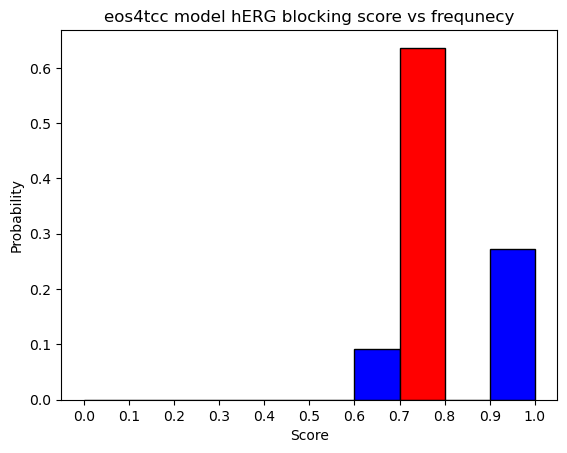

In [84]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

# Plot between the hERG blocking activity of molecules and their frequency
b = np.arange(0.0, 1.1, 0.1)
score=eos4tcc_output['score'].to_list()
weights = np.ones_like(score) / float(len(score))
plt.hist(score, bins=b, edgecolor='black',weights=weights,color='blue')
max_probability_bin = plt.gca().patches[max(range(len(plt.gca().patches)), key=lambda i: plt.gca().patches[i].get_height())]
max_probability_bin.set_facecolor('red')
plt.title('eos4tcc model hERG blocking score vs frequnecy')
plt.xlabel('Score')
ticks=np.arange(0.0,1.1,0.1)
plt.xticks(ticks)
plt.ylabel('Probability')
plt.savefig("/Users/srushtihirve/Desktop/Ersilia/data")
plt.show()



Inference from the histogram
- Most of the molecules (about 60%) have hERG blocking activity score in the range 
- Molecules with very strong hERG blocking activity i.e. hERG blocking activity score > 0.95 are just approximately 0.5%.

Aleatoric uncertainty arises from inherent randomness in the data itself, such as noise in the observations. Epistemic uncertainty, on the other hand, arises from uncertainty in the model parameters due to limited training data.



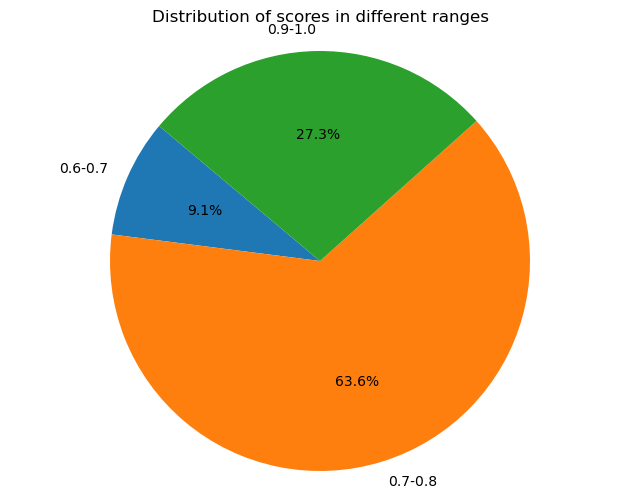

In [86]:
# showing the percentage of each interval of hERG blocking activity

ranges = [(0, 0.1), (0.1, 0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,0.6), (0.6,0.7), (0.7,0.8), (0.8,0.9), (0.9,1.0)]
categories = []
for value in eos4tcc_output['score']:
    for r in ranges:
        if r[0] <= value < r[1]:
            categories.append(r)
            break
counts = pd.Series(categories).value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=[f'{r[0]}-{r[1]}' for r in counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of scores in different ranges')
plt.axis('equal')
plt.savefig("/Users/srushtihirve/Desktop/Ersilia")
plt.show()

Inference of Pie Chart
- It's evident that over 60% of the molecules exhibit hERG blocking activity scores ranging from 0.7 to 0.8.

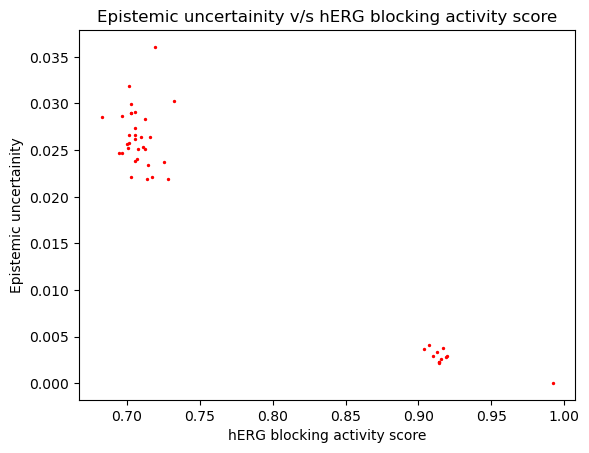

In [101]:
# sorting the dataframe accoring to the score values to make inferences about uncertainity

sorted_df=eos4tcc_output.sort_values(by='score')

x = sorted_df['score'].to_list()
y = sorted_df['epis'].to_list()
plt.title('Epistemic uncertainity v/s hERG blocking activity score')
plt.xlabel('hERG blocking activity score')
plt.ylabel('Epistemic uncertainity')
plt.scatter(x, y, color = 'red',s=2)
plt.savefig("/Users/srushtihirve/Desktop/Ersilia")
plt.show()


Inference from dataset

Higher HERG blocking activity scores are associated with lower epistemic uncertainty.
This means that for molecules with a high blocking activity score, there is more certainty about the prediction.

